<a href="https://colab.research.google.com/github/Irenekayla/ML_Notebooks/blob/main/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

# Generating synthetic data
np.random.seed(0)
data_size = 200
features = np.random.rand(data_size, 2)  # Two features: visit duration and pages visited
labels = (features[:, 0] + features[:, 1] > 1).astype(int)  # Purchase (1) or not (0)

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(features, columns=['VisitDuration', 'PagesVisited'])
df['Purchase'] = labels

In [2]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df[['VisitDuration', 'PagesVisited']], df['Purchase'], test_size=0.2, random_state=42)

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),  # Input layer with 2 features
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
16/16 [==============================] - 1s 2ms/step - loss: 0.6693 - accuracy: 0.5625
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6653 - accuracy: 0.5688
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6618 - accuracy: 0.6062
Epoch 4/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6579 - accuracy: 0.6375
Epoch 5/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6545 - accuracy: 0.6500
Epoch 6/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6513 - accuracy: 0.6812
Epoch 7/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6473 - accuracy: 0.7000
Epoch 8/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6437 - accuracy: 0.7063
Epoch 9/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6398 - accuracy: 0.7250
Epoch 10/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6356 - accuracy: 0.7375


In [4]:

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

2/2 [==============================] - 0s 11ms/step - loss: 0.6158 - accuracy: 0.7750
Test Accuracy: 0.7749999761581421


Epoch 1/10
13/13 [==============================] - 1s 13ms/step - loss: 0.6348 - accuracy: 0.7344 - val_loss: 0.6159 - val_accuracy: 0.8438
Epoch 2/10
13/13 [==============================] - 0s 7ms/step - loss: 0.6313 - accuracy: 0.7344 - val_loss: 0.6122 - val_accuracy: 0.8125
Epoch 3/10
13/13 [==============================] - 0s 9ms/step - loss: 0.6278 - accuracy: 0.7500 - val_loss: 0.6084 - val_accuracy: 0.8125
Epoch 4/10
13/13 [==============================] - 0s 7ms/step - loss: 0.6241 - accuracy: 0.7500 - val_loss: 0.6047 - val_accuracy: 0.8125
Epoch 5/10
13/13 [==============================] - 0s 9ms/step - loss: 0.6206 - accuracy: 0.7969 - val_loss: 0.6008 - val_accuracy: 0.8125
Epoch 6/10
13/13 [==============================] - 0s 6ms/step - loss: 0.6170 - accuracy: 0.8047 - val_loss: 0.5969 - val_accuracy: 0.8125
Epoch 7/10
13/13 [==============================] - 0s 7ms/step - loss: 0.6134 - accuracy: 0.8203 - val_loss: 0.5929 - val_accuracy: 0.8438
Epoch 8/10
13/13 [=

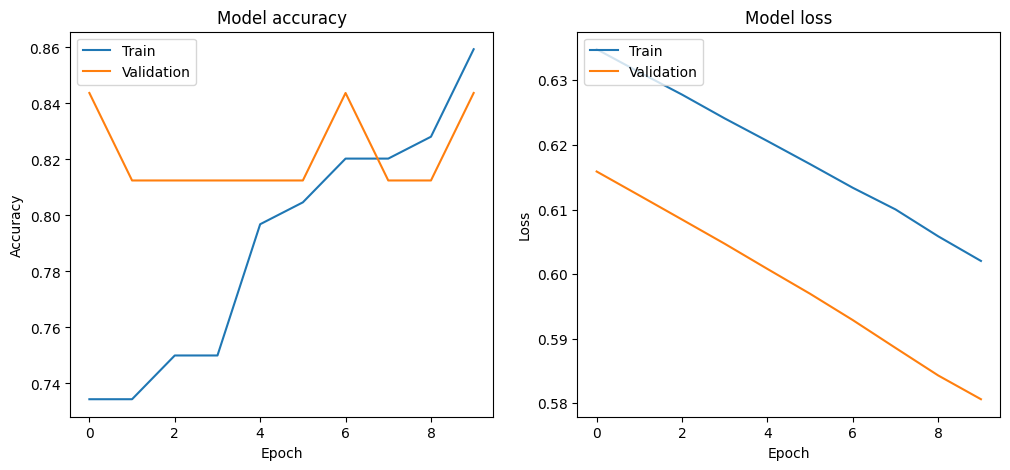

In [5]:
import warnings
warnings.filterwarnings('ignore')


history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()